# 1.  Reading Large CSV from Twarc

As the CSV extracted from the Twitter API is very large and contains columns and records that we need, we need to filter out those columns and records. We will be processing that CSV to creat a new file with records we need.

In the first step, let's import required libraries.

In [1]:
# Importing pandas and numpy library to process data
import pandas as pd
import numpy as np
import seaborn as sns

In the next step, we will read the large csv file ~4GB to a dataframe and visualize few records to see the data.

In [2]:
# Reading the tweets.csv file into a DataFrame
with open('tweets.csv', encoding="utf8") as f:
    df = pd.read_csv(f)

C:\Users\sures\AppData\Local\Temp\ipykernel_70936\2646925917.py:3: DtypeWarning: Columns (23,24,25,27,45,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)


In [3]:
# List all records in DataFrame by printing 5 sample records
df.sample(5)

,id,conversation_id,referenced_tweets.replied_to.id,referenced_tweets.retweeted.id,referenced_tweets.quoted.id,edit_history_tweet_ids,edit_controls.edits_remaining,edit_controls.editable_until,edit_controls.is_edit_eligible,author_id,...,geo.geo.type,geo.id,geo.name,geo.place_id,geo.place_type,matching_rules,__twarc.retrieved_at,__twarc.url,__twarc.version,Unnamed: 78
40583,1544692944371945475,1544692944371945475,NaN,NaN,NaN,"[""1544692944371945475""]",5,2022-07-06T15:11:11.000Z,True,554568565,...,Feature,3f81e4ab7f76195f,Kidderminster,3f81e4ab7f76195f,city,NaN,2023-01-01T14:47:18+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.12.0,NaN
74211,1495741837667188742,1495741837667188742,NaN,NaN,NaN,"[""1495741837667188742""]",5,2022-02-21T13:16:58.000Z,True,404103317,...,Feature,759dfe79a02eb78a,Blackburn,759dfe79a02eb78a,city,NaN,2023-01-01T15:06:13+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.12.0,NaN
77583,1489887323189874689,1489887323189874689,NaN,NaN,NaN,"[""1489887323189874689""]",5,2022-02-05T09:33:13.000Z,True,158332057,...,Feature,616ba1df27270916,Oxford,616ba1df27270916,city,NaN,2023-01-01T15:08:11+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.12.0,NaN
102062,1447167927753613318,1447167927753613318,NaN,NaN,NaN,"[""1447167927753613318""]",5,2021-10-10T12:21:35.000Z,True,1038330765422018561,...,Feature,70392b0b6ad1f95b,Chester,70392b0b6ad1f95b,city,NaN,2023-01-01T15:22:02+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.12.0,NaN
201277,1316359067175063557,1316359067175063557,NaN,NaN,NaN,"[""1316359067175063557""]",5,2020-10-14T13:13:53.000Z,True,131638747,...,Feature,78e9729ff12a648e,Northern Ireland,78e9729ff12a648e,admin,NaN,2023-01-01T16:18:45+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.12.0,NaN


Now, let's print the list of columns from the dataframe and see different records and columns we have on our csv file.

In [4]:
# Print all columns in the DataFrame
for col in df.columns:
    print(col)

id
conversation_id
referenced_tweets.replied_to.id
referenced_tweets.retweeted.id
referenced_tweets.quoted.id
edit_history_tweet_ids
edit_controls.edits_remaining
edit_controls.editable_until
edit_controls.is_edit_eligible
author_id
in_reply_to_user_id
retweeted_user_id
quoted_user_id
created_at
text
lang
source
public_metrics.like_count
public_metrics.quote_count
public_metrics.reply_count
public_metrics.retweet_count
reply_settings
possibly_sensitive
withheld.scope
withheld.copyright
withheld.country_codes
entities.annotations
entities.cashtags
entities.hashtags
entities.mentions
entities.urls
context_annotations
attachments.media
attachments.media_keys
attachments.poll.duration_minutes
attachments.poll.end_datetime
attachments.poll.id
attachments.poll.options
attachments.poll.voting_status
attachments.poll_ids
author.id
author.created_at
author.username
author.name
author.description
author.entities.description.cashtags
author.entities.description.hashtags
author.entities.descriptio

Let's create a new dataframe using the only columns we need.

In [5]:
new_df = df[['id','created_at','text','lang','geo.country','geo.place_type','geo.name','geo.full_name','geo.coordinates.type', 'geo.coordinates.coordinates', 'entities.hashtags']].copy()

Let's go through our data and see if there are any preliminary data clean ups needed

In [6]:
#Let's see how many records for each column has not null values
new_df.notnull().sum()

id                             339074
created_at                     339074
text                           339074
lang                           339074
geo.country                    338919
geo.place_type                 338919
geo.name                       338919
geo.full_name                  338919
geo.coordinates.type           112465
geo.coordinates.coordinates    112465
entities.hashtags              338934
dtype: int64

Here, we can see that 261245 records have the geo-coordinate column in them which can be utilized for our analysis. So, we will be dropping other records with null cooordinate columns.

In [7]:
# Drop null records from the dataframe
new_df=new_df.dropna()

In [8]:
# Let's see how many records are there now
new_df.notnull().sum()

id                             112389
created_at                     112389
text                           112389
lang                           112389
geo.country                    112389
geo.place_type                 112389
geo.name                       112389
geo.full_name                  112389
geo.coordinates.type           112389
geo.coordinates.coordinates    112389
entities.hashtags              112389
dtype: int64

Let's rename columns to the name we want.

In [9]:
new_df.rename(columns = {'created_at':'created_at','text':'text','lang':'language','geo.country':'country','geo.coordinates.coordinates':'coordinates',
                           'geo.full_name':'address', 'geo.name':'location', 
                           'geo.place_type':'place_type' }, inplace = True)

# 2. Split the Coordinates column into Latitude and Longitude

As our dataframe has coordinates field combined in a single one, we need to split it in latitude and longitude values.

In [10]:
# Splitting latitude and longitude
splitData = new_df["coordinates"].str.split(",", n=1, expand=True)

# making new column Pos from first part of the split data, 
# also remove front and back brackets if any
new_df["longitude"] = splitData[0].str.strip("[]")

# making new column state from second part of the split data, 
# also remove front and back brackets if any
new_df["latitude"] = splitData[1].str.strip("[]")

In [11]:
# Change Data Type of latitude and longitude
new_df['latitude'] = new_df['latitude'].astype(float)
new_df['longitude'] = new_df['longitude'].astype(float)


# 3. Identify London and Brighton Data

Adding a new column 'loc' to identify whether a data is from London or from Brighton

In [12]:
# Check the dataframe info
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112389 entries, 3 to 339073
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    112389 non-null  int64  
 1   created_at            112389 non-null  object 
 2   text                  112389 non-null  object 
 3   language              112389 non-null  object 
 4   country               112389 non-null  object 
 5   place_type            112389 non-null  object 
 6   location              112389 non-null  object 
 7   address               112389 non-null  object 
 8   geo.coordinates.type  112389 non-null  object 
 9   coordinates           112389 non-null  object 
 10  entities.hashtags     112389 non-null  object 
 11  longitude             112389 non-null  float64
 12  latitude              112389 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 12.0+ MB


In [13]:
# L means London and B meand Brighton
# new_df['loc'] = np.where(new_df['address'].str.contains("Brighton|, Brighton"), "B",np.where(new_df['address'].str.contains("London|, London"), "L", 'Other'))
# new_df['loc'] = np.where(new_df['address'].str.contains("London|, London"), "L", 'Other')
new_df['loc'] = np.where((new_df['latitude']>51.28)&(new_df['latitude']<51.69) & (new_df['longitude']> -0.5) & (new_df['longitude']< 0.35), "L",np.where((new_df['latitude']>50.81)&(new_df['latitude']<50.87) & (new_df['longitude']< -0.10) & (new_df['longitude']> -0.20), "B","Other"))

In [14]:
# Keep records wuth L and B only in the loc field
new_df = new_df[new_df['loc'] != 'Other']

<AxesSubplot:title={'center':'Tweets Count for London and Brighton'}, xlabel='London and Brighton Data', ylabel='Count'>

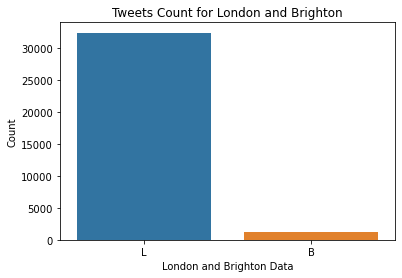

In [15]:
# Print Countplot for London and Brighton Data
c=sns.countplot(x=new_df["loc"])
c.set_xlabel('London and Brighton Data')
c.set_ylabel('Count')
c.set_title('Tweets Count for London and Brighton')
c

In [16]:
# Print the data
new_df.head()

,id,created_at,text,language,country,place_type,location,address,geo.coordinates.type,coordinates,entities.hashtags,longitude,latitude,loc
107,1609177175701217287,2022-12-31T13:18:30.000Z,Gap #waterloostation #london #london4all \n#tf...,und,United Kingdom,city,City of London,"City of London, London",Point,"[-0.1094, 51.5141]","[{""start"": 4, ""end"": 20, ""tag"": ""waterloostati...",-0.109400,51.514100,L
112,1609170627553787906,2022-12-31T12:52:29.000Z,Check out our website. #Corporation #romanerob...,en,United Kingdom,city,City of London,"City of London, London",Point,"[-0.1094, 51.5141]","[{""start"": 23, ""end"": 35, ""tag"": ""Corporation""...",-0.109400,51.514100,L
143,1609136646854955010,2022-12-31T10:37:27.000Z,#Tourism #Hogmanay #EdinburghCastle #PoliceSco...,en,United Kingdom,city,London,"London, England",Point,"[-0.12245947, 51.50963765]","[{""start"": 0, ""end"": 8, ""tag"": ""Tourism""}, {""s...",-0.122459,51.509638,L
164,1609120298976133120,2022-12-31T09:32:29.000Z,#Happy #NYE #vauxhall #London We look forward ...,en,United Kingdom,city,Wandsworth,"Wandsworth, London",Point,"[-0.14751882, 51.47397436]","[{""start"": 0, ""end"": 6, ""tag"": ""Happy""}, {""sta...",-0.147519,51.473974,L
203,1608965261373104135,2022-12-30T23:16:26.000Z,"Love you hijos, it’s been amazing day! #london...",en,United Kingdom,city,Greenwich,"Greenwich, London",Point,"[0.00306845, 51.50289489]","[{""start"": 39, ""end"": 46, ""tag"": ""london""}, {""...",0.003068,51.502895,L


In [17]:
# Select the sample data
new_df.sample(10)

,id,created_at,text,language,country,place_type,location,address,geo.coordinates.type,coordinates,entities.hashtags,longitude,latitude,loc
263547,1269020783600234496,2020-06-05T21:38:26.000Z,Monday 👀 \n.\n#ggwclothing #gogetterworld #gog...,en,United Kingdom,city,London,"London, England",Point,"[-0.12731805, 51.50711486]","[{""start"": 12, ""end"": 24, ""tag"": ""ggwclothing""...",-0.127318,51.507115,L
310649,1233750267247632385,2020-02-29T13:46:00.000Z,The millennium bridge and Tate Modern\n•\n•\n#...,en,United Kingdom,city,City of London,"City of London, London",Point,"[-0.09838343, 51.51014807]","[{""start"": 42, ""end"": 49, ""tag"": ""london""}, {""...",-0.098383,51.510148,L
265773,1267426505480601600,2020-06-01T12:03:21.000Z,Automated systems is the key to a productive w...,en,United Kingdom,city,City of London,"City of London, London",Point,"[-0.1094, 51.5141]","[{""start"": 60, ""end"": 72, ""tag"": ""twobrothers""...",-0.109400,51.514100,L
294509,1246838001562464257,2020-04-05T16:31:59.000Z,"With extra time on my hands🤪, I realized I hav...",en,United Kingdom,city,Brighton,"Brighton, England",Point,"[-0.140011, 50.8216836]","[{""start"": 135, ""end"": 147, ""tag"": ""photograph...",-0.140011,50.821684,B
333615,1216628185774854145,2020-01-13T07:48:58.000Z,Woo hop it’s Monday!! Another opportunity to...,en,United Kingdom,city,Kingston upon Thames,"Kingston upon Thames, London",Point,"[-0.29142, 51.41104]","[{""start"": 139, ""end"": 146, ""tag"": ""health""}, ...",-0.291420,51.411040,L
308912,1235114964727115776,2020-03-04T08:08:49.000Z,Two new titles:\n\nCafé Royal Books: Simon Pop...,en,United Kingdom,city,London,"London, England",Point,"[-0.12731805, 51.50711486]","[{""start"": 118, ""end"": 133, ""tag"": ""caferoyalb...",-0.127318,51.507115,L
116416,1426485217351581699,2021-08-14T10:05:53.000Z,"Just lovely!! Great service, food, tea and cha...",en,United Kingdom,city,Camden Town,"Camden Town, London",Point,"[-0.1623197, 51.5456005]","[{""start"": 67, ""end"": 72, ""tag"": ""cafe""}, {""st...",-0.162320,51.545600,L
333393,1216762049121804288,2020-01-13T16:40:53.000Z,«Non dobbiamo soccombere a infelicità e dubbio...,it,United Kingdom,city,Camberwell,"Camberwell, London",Point,"[-0.07939436, 51.47496745]","[{""start"": 182, ""end"": 189, ""tag"": ""London""}, ...",-0.079394,51.474967,L
92286,1462432641785946118,2021-11-21T14:48:07.000Z,Mole Bank #painshillpark #surrey #cobham #lake...,en,United Kingdom,admin,South East,"South East, England",Point,"[-0.421737, 51.33030959]","[{""start"": 10, ""end"": 24, ""tag"": ""painshillpar...",-0.421737,51.330310,L
309391,1234751582522052608,2020-03-03T08:04:52.000Z,At what point do you admit that your body can’...,en,United Kingdom,city,Hounslow,"Hounslow, London",Point,"[-0.3276492, 51.48877111]","[{""start"": 143, ""end"": 151, ""tag"": ""fitness""},...",-0.327649,51.488771,L


# 4. Export Data to CSV 

Let's save the result to a CSV file that will be used for data cleaning and preprocessing

In [18]:
# Create a new dataframe with the selected list of columns
result = new_df[['text','created_at','address','longitude','latitude','loc']]
#Save the result to CSV
result.to_csv("ready_for_preprocessing.csv")


In [19]:
result.sample(5)

,text,created_at,address,longitude,latitude,loc
261462,#flowerphotography #flower #floral #flowerstag...,2020-06-10T06:53:41.000Z,"Camden Town, London",-0.144100,51.531500,L
21007,#immersive #london #nightsout #canadawater #en...,2022-09-18T12:13:47.000Z,"Camberwell, London",-0.045371,51.497747,L
94163,Always great to see you @michealward! #thehard...,2021-11-13T00:31:58.000Z,"Camden Town, London",-0.121210,51.515260,L
95619,"Ok, let’s have a couple of cocktails with @mat...",2021-11-06T17:35:05.000Z,"London, England",-0.134370,51.511530,L
308552,Always gotta be fun👑#london #love #danieldavid...,2020-03-04T19:34:15.000Z,"London, England",-0.127318,51.507115,L
